In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews = pd.read_csv("D:/Pythonn/IMDB Dataset.csv")

In [3]:
reviews.shape

(50000, 2)

In [4]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
reviews['sentiment'][0]

'positive'

In [6]:
reviews['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
len(reviews[reviews['sentiment']=='negative'])

25000

In [8]:
mapping = {'positive': 0, 'negative': 1}
reviews['sentiment'] = reviews['sentiment'].replace(mapping)

In [9]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [10]:
len(reviews[reviews['sentiment']==0])

25000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [12]:
sample = reviews['review'][0]
sample

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [13]:
## to remove all html tags,
from bs4 import BeautifulSoup

In [14]:
def remove_tags(text):
    html = BeautifulSoup(text)
    return html.text

In [15]:
sample_no_tags = remove_tags(sample)
sample_no_tags

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [16]:
## removing punchuation marks
import re

In [17]:
def remove_punctuations(text):
    return re.sub('[^a-zA-Z]',' ',text)

In [18]:
sample_no_punc = remove_punctuations(sample_no_tags)

In [19]:
sample_no_punc

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [20]:
def remove_spaces(text):
    return re.sub(r'\s+',' ',text)

In [21]:
sample_no_spaces = remove_spaces(sample_no_punc)
sample_no_spaces

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare Forget pretty p

In [22]:
def remove_singles(text):
    return re.sub(r'\b[a-zA-Z]\b','' ,text)

In [23]:
sample_clean = remove_singles(sample_no_spaces)
sample_clean

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not  show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away  would say the main appeal of the show is due to the fact that it goes where other shows wouldn  dare Forget pretty pict

In [24]:
sample_clean = remove_spaces(sample_clean)

In [25]:
sample_clean

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [26]:
def clean_text(text):
    text = remove_tags(text)
    text = remove_punctuations(text)
    text = remove_singles(text)
    text = remove_spaces(text)
    return text

Apply this to all the reviews

In [27]:
clean_reviews = reviews['review'].apply(func=clean_text)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13216\373938602.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  html = BeautifulSoup(text)


In [28]:
clean_reviews[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

Preprocessng the labels

In [29]:
labels = reviews['sentiment']

In [30]:
labels.unique()

array([0, 1], dtype=int64)

Preparinf the training and testing split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test , y_train, y_test = train_test_split(clean_reviews,
                                                     labels,
                                                     test_size = 0.25,#75% of traning data
                                                     random_state = 10)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37500,), (12500,), (37500,), (12500,))

Tokenize the data


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [35]:
tokenize = Tokenizer(num_words = 100000)

In [36]:
tokenize.fit_on_texts(x_train)

In [37]:
x_train = tokenize.texts_to_sequences(x_train)
x_test = tokenize.texts_to_sequences(x_test)

In [38]:
print(tokenize.word_index)

{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'is': 5, 'it': 6, 'in': 7, 'this': 8, 'that': 9, 'was': 10, 'as': 11, 'movie': 12, 'with': 13, 'for': 14, 'but': 15, 'film': 16, 'you': 17, 'on': 18, 'not': 19, 'he': 20, 'are': 21, 'his': 22, 'have': 23, 'one': 24, 'be': 25, 'all': 26, 'at': 27, 'they': 28, 'by': 29, 'an': 30, 'who': 31, 'so': 32, 'from': 33, 'like': 34, 'there': 35, 'or': 36, 'just': 37, 'her': 38, 'out': 39, 'about': 40, 'if': 41, 'has': 42, 'what': 43, 'some': 44, 'good': 45, 'can': 46, 'more': 47, 'when': 48, 'very': 49, 'she': 50, 'up': 51, 'no': 52, 'time': 53, 'even': 54, 'my': 55, 'would': 56, 'which': 57, 'story': 58, 'only': 59, 'really': 60, 'see': 61, 'their': 62, 'had': 63, 'well': 64, 'me': 65, 'were': 66, 'we': 67, 'than': 68, 'much': 69, 'get': 70, 'bad': 71, 'do': 72, 'been': 73, 'other': 74, 'great': 75, 'will': 76, 'people': 77, 'also': 78, 'into': 79, 'how': 80, 'because': 81, 'first': 82, 'don': 83, 'him': 84, 'most': 85, 'made': 86, 'its': 87, 'them': 88, 't

In [39]:
x_train[0]

[41,
 17,
 34,
 324,
 5520,
 44,
 71,
 109,
 2,
 915,
 566,
 3,
 2864,
 8,
 5,
 12,
 14,
 17,
 32,
 60,
 670,
 249,
 12,
 15,
 423,
 6,
 527,
 131,
 81,
 34,
 141,
 234,
 3,
 94,
 46,
 344,
 15,
 1875,
 48,
 61,
 128,
 234,
 3,
 94,
 43,
 66,
 1,
 1103,
 146,
 148,
 2,
 5520,
 77,
 519,
 48,
 28,
 86,
 8,
 16,
 83,
 505,
 30,
 11071,
 36,
 1162,
 37,
 49,
 345,
 323,
 173,
 1126,
 12,
 35,
 5,
 24,
 328,
 4402,
 546,
 48,
 207,
 395,
 5,
 313,
 118,
 15,
 14,
 1,
 85,
 1,
 173,
 5,
 178,
 4191,
 1,
 446,
 727,
 5,
 178,
 564,
 93,
 6,
 59,
 218,
 189,
 32,
 17,
 46,
 136,
 353,
 35,
 264,
 17,
 46,
 1119,
 6,
 51,
 27,
 123,
 678,
 19506,
 36,
 101,
 6,
 18,
 230,
 243,
 17,
 76,
 23,
 45,
 53,
 144,
 6,
 15,
 83,
 129,
 17,
 1165,
 2814]

In [40]:
tokenize.sequences_to_texts([x_train[0]])

['if you like poor se some bad acting and total lack of credibility this is movie for you so really cheap looking movie but liked it anyway why because like those kind of movies can help but smile when see these kind of movies what were the producers actors director and se people thinking when they made this film don expect an abyss or alien just very low budget horror adventure movie there is one nice splatter moment when guy head is shot off but for the most the horror is pretty tame the final monster is pretty cool too it only minutes long so you can go wrong there maybe you can pick it up at your local videostore or watch it on tv sure you will have good time watching it but don say you weren warned']

Padding


In [41]:
Pad_length = 150

Size = len(tokenize.word_index)+1
print(Size)

89853


In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
x_train = pad_sequences(x_train,padding='post',maxlen=Pad_length)

In [44]:
x_test = pad_sequences(x_test,padding='post',maxlen=Pad_length)

In [45]:
for i in x_train[:10]:
    print(len(i))

150
150
150
150
150
150
150
150
150
150


In [46]:
glove = pd.read_csv("D:/Pythonn/glove.6B.100d.txt",sep = ' ',quoting=3,header = None,index_col=0)

In [47]:
glove.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
the,-0.038194,-0.244870,0.72812,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.57545,0.087459,...,0.016215,-0.017099,-0.389840,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.270620
",",-0.107670,0.110530,0.59812,-0.543610,0.673960,0.106630,0.038867,0.354810,0.06351,-0.094189,...,0.349510,-0.722600,0.375490,0.44410,-0.99059,0.61214,-0.351110,-0.83155,0.45293,0.082577
.,-0.339790,0.209410,0.46348,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.46619,-0.019169,...,-0.063351,-0.674120,-0.068895,0.53604,-0.87773,0.31802,-0.392420,-0.23394,0.47298,-0.028803
of,-0.152900,-0.242790,0.89837,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.35810,0.425410,...,0.187120,-0.018488,-0.267570,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.206640
to,-0.189700,0.050024,0.19084,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.20135,0.342410,...,-0.131340,0.058617,-0.318690,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.159830


In [48]:
embeddings_dictionary = {key: val.values for key, val in glove.T.items()}

Embedding matrix

In [49]:
embeddings_matrix = np.zeros((Size,100))

for word,index in tokenize.word_index.items():
    emb_vector = embeddings_dictionary.get(word)
    if emb_vector is not None:
        embeddings_matrix[index] = emb_vector
            

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense ,Flatten,Activation
from tensorflow.keras.layers import Dropout, GlobalMaxPool2D

In [51]:
model = Sequential()

In [52]:
emb_layer = Embedding(
    input_dim = Size,
    output_dim = 100,
    weights = [embeddings_matrix],
    input_length = Pad_length,
    trainable = False ## make this untrainable so the weigths dont change while training
)

In [53]:
model.add(emb_layer)
model.add(Flatten())

In [54]:
model.add(Dense(1,activation = 'sigmoid'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          8985300   
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 1)                 15001     
                                                                 
Total params: 9000301 (34.33 MB)
Trainable params: 15001 (58.60 KB)
Non-trainable params: 8985300 (34.28 MB)
_________________________________________________________________


In [56]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [57]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs = 20,
    validation_split = 0.25
)

Epoch 1/20


220/220 [==============================] - 2s 7ms/step - loss: 1.8708 - accuracy: 0.5045 - val_loss: 1.6299 - val_accuracy: 0.5056
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 1.4409 - accuracy: 0.5450 - val_loss: 1.3209 - val_accuracy: 0.5381
Epoch 3/20
220/220 [==============================] - 1s 5ms/step - loss: 1.1778 - accuracy: 0.5897 - val_loss: 1.2061 - val_accuracy: 0.5660
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 1.0795 - accuracy: 0.6066 - val_loss: 1.4778 - val_accuracy: 0.5363
Epoch 5/20
220/220 [==============================] - 1s 5ms/step - loss: 0.9614 - accuracy: 0.6354 - val_loss: 0.7185 - val_accuracy: 0.6745
Epoch 6/20
220/220 [==============================] - 1s 5ms/step - loss: 0.8435 - accuracy: 0.6634 - val_loss: 0.9553 - val_accuracy: 0.6142
Epoch 7/20
220/220 [==============================] - 1s 5ms/step - loss: 0.8032 - accuracy: 0.6719 - val_loss: 0.6564 - val_accuracy: 0.7148
Epoc

In [58]:
Score = model.evaluate(x_test,y_test,return_dict = True)
Score

391/391 [==============================] - 1s 2ms/step - loss: 1.2505 - accuracy: 0.5954


{'loss': 1.2504881620407104, 'accuracy': 0.5954399704933167}

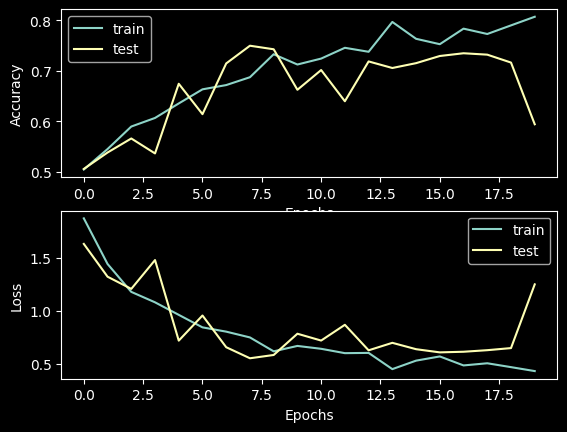

In [59]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [60]:
model2 = Sequential()

In [61]:
model2.add(emb_layer)
model.add(Flatten())

In [62]:
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

In [63]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          8985300   
                                                                 
 dense_1 (Dense)             (None, 150, 10)           1010      
                                                                 
 dense_2 (Dense)             (None, 150, 10)           110       
                                                                 
 dense_3 (Dense)             (None, 150, 10)           110       
                                                                 
 dense_4 (Dense)             (None, 150, 1)            11        
                                                                 
Total params: 8986541 (34.28 MB)
Trainable params: 1241 (4.85 KB)
Non-trainable params: 8985300 (34.28 MB)
_________________________________________________________________


In [64]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [65]:
history2 = model2.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 50,
    validation_split=0.25
)

Epoch 1/50
440/440 [==============================] - 4s 7ms/step - loss: 0.6982 - accuracy: 0.4916 - val_loss: 0.6950 - val_accuracy: 0.4930
Epoch 2/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6946 - accuracy: 0.4942 - val_loss: 0.6941 - val_accuracy: 0.4957
Epoch 3/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6939 - accuracy: 0.4960 - val_loss: 0.6936 - val_accuracy: 0.4979
Epoch 4/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6936 - accuracy: 0.4983 - val_loss: 0.6933 - val_accuracy: 0.4996
Epoch 5/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6931 - val_accuracy: 0.5093
Epoch 6/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6931 - accuracy: 0.5074 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 7/50
440/440 [==============================] - 3s 6ms/step - loss: 0.6930 - accuracy: 0.5105 - val_loss: 0.6928 - val_accuracy: 0.5142
Epoch 

In [66]:
model2.evaluate(x_test,y_test,return_dict=True)

391/391 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5331


{'loss': 0.6895654201507568, 'accuracy': 0.5330568552017212}

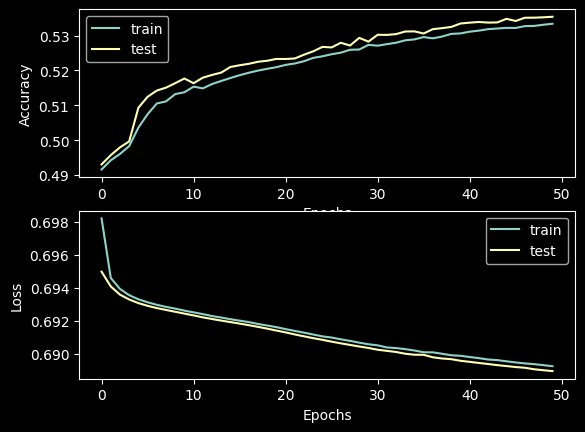

In [70]:
plt.subplot(211)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(212)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

Lets try CNN

In [68]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D

In [69]:
model3 = Sequential()

In [71]:
model3.add(emb_layer)

In [75]:
model3.add(Conv1D(filters = 64,
                 kernel_size = 6,
                 activation = 'relu'
                 ))

In [76]:
model3.add(GlobalMaxPool1D())

In [77]:
model3.add(Dense(1, activation='sigmoid'))

In [80]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          8985300   
                                                                 
 conv1d_1 (Conv1D)           (None, 145, 64)           38464     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9023829 (34.42 MB)
Trainable params: 38529 (150.50 KB)
Non-trainable params: 8985300 (34.28 MB)
_________________________________________________________________


In [81]:
model3.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [82]:
history3 = model3.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs = 20,
    validation_split=0.25,
)

Epoch 1/20
440/440 [==============================] - 6s 11ms/step - loss: 0.6594 - accuracy: 0.6127 - val_loss: 0.6341 - val_accuracy: 0.6412
Epoch 2/20
440/440 [==============================] - 4s 10ms/step - loss: 0.5852 - accuracy: 0.7093 - val_loss: 0.5683 - val_accuracy: 0.7150
Epoch 3/20
440/440 [==============================] - 4s 10ms/step - loss: 0.5237 - accuracy: 0.7579 - val_loss: 0.5063 - val_accuracy: 0.7621
Epoch 4/20
440/440 [==============================] - 4s 10ms/step - loss: 0.4681 - accuracy: 0.7889 - val_loss: 0.4647 - val_accuracy: 0.7830
Epoch 5/20
440/440 [==============================] - 4s 10ms/step - loss: 0.4268 - accuracy: 0.8105 - val_loss: 0.4375 - val_accuracy: 0.7958
Epoch 6/20
440/440 [==============================] - 4s 10ms/step - loss: 0.3979 - accuracy: 0.8249 - val_loss: 0.4234 - val_accuracy: 0.8052
Epoch 7/20
440/440 [==============================] - 4s 10ms/step - loss: 0.3779 - accuracy: 0.8366 - val_loss: 0.4063 - val_accuracy: 0.8140

In [83]:
model.evaluate(x_test,y_test,return_dict=True)

391/391 [==============================] - 1s 3ms/step - loss: 1.2505 - accuracy: 0.5954


{'loss': 1.2504881620407104, 'accuracy': 0.5954399704933167}

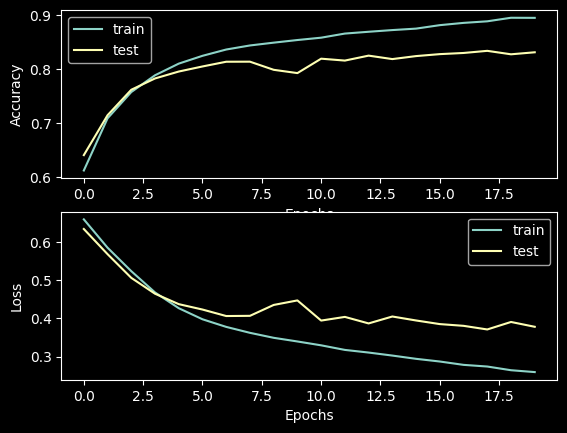

In [84]:
plt.subplot(211)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(212)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

Implementing RNN 

In [86]:
from tensorflow.keras.layers import SimpleRNN

In [92]:
rnn = Sequential()

In [93]:
rnn.add(emb_layer)

In [94]:
rnn.add(SimpleRNN(128))
rnn.add(Dense(1,activation='sigmoid'))

In [95]:
rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          8985300   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9014741 (34.39 MB)
Trainable params: 29441 (115.00 KB)
Non-trainable params: 8985300 (34.28 MB)
_________________________________________________________________


In [96]:
rnn.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [97]:
rnn_history = rnn.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 20,
    validation_split=0.25
)

Epoch 1/20
440/440 [==============================] - 14s 29ms/step - loss: 0.7012 - accuracy: 0.5228 - val_loss: 0.6890 - val_accuracy: 0.5312
Epoch 2/20
440/440 [==============================] - 12s 28ms/step - loss: 0.6843 - accuracy: 0.5468 - val_loss: 0.6791 - val_accuracy: 0.5583
Epoch 3/20
440/440 [==============================] - 13s 28ms/step - loss: 0.6797 - accuracy: 0.5645 - val_loss: 0.6830 - val_accuracy: 0.5482
Epoch 4/20
440/440 [==============================] - 13s 29ms/step - loss: 0.6806 - accuracy: 0.5507 - val_loss: 0.6765 - val_accuracy: 0.5647
Epoch 5/20
440/440 [==============================] - 12s 28ms/step - loss: 0.6737 - accuracy: 0.5615 - val_loss: 0.6708 - val_accuracy: 0.5756
Epoch 6/20
440/440 [==============================] - 12s 28ms/step - loss: 0.6647 - accuracy: 0.5809 - val_loss: 0.6608 - val_accuracy: 0.5936
Epoch 7/20
440/440 [==============================] - 13s 29ms/step - loss: 0.6680 - accuracy: 0.5934 - val_loss: 0.6889 - val_accuracy:

Using LSTM to imprve the perform

In [98]:
from tensorflow.keras.layers import LSTM

In [99]:
lstm = Sequential()

In [100]:
lstm.add(emb_layer)
lstm.add(LSTM(128))
lstm.add(Dense(1,activation='sigmoid'))

In [101]:
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          8985300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9102677 (34.72 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 8985300 (34.28 MB)
_________________________________________________________________


In [104]:
lstm.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [105]:
lstm_history = lstm.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 20,
    validation_split = 0.25
)

Epoch 1/20
440/440 [==============================] - 48s 105ms/step - loss: 0.6917 - accuracy: 0.5230 - val_loss: 0.6873 - val_accuracy: 0.5465
Epoch 2/20
440/440 [==============================] - 46s 104ms/step - loss: 0.6835 - accuracy: 0.5572 - val_loss: 0.6789 - val_accuracy: 0.5719
Epoch 3/20
440/440 [==============================] - 47s 106ms/step - loss: 0.6738 - accuracy: 0.5816 - val_loss: 0.6657 - val_accuracy: 0.5971
Epoch 4/20
440/440 [==============================] - 44s 100ms/step - loss: 0.6476 - accuracy: 0.6268 - val_loss: 0.6338 - val_accuracy: 0.6303
Epoch 5/20
440/440 [==============================] - 43s 98ms/step - loss: 0.6159 - accuracy: 0.6690 - val_loss: 0.6065 - val_accuracy: 0.6766
Epoch 6/20
440/440 [==============================] - 43s 99ms/step - loss: 0.5889 - accuracy: 0.6984 - val_loss: 0.5649 - val_accuracy: 0.7120
Epoch 7/20
440/440 [==============================] - 43s 98ms/step - loss: 0.5768 - accuracy: 0.7068 - val_loss: 0.5137 - val_accur

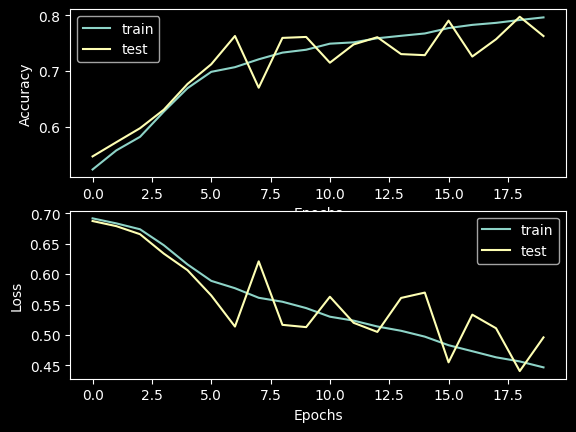

In [106]:
plt.subplot(211)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(212)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [107]:
from tensorflow.keras.optimizers import SGD

In [109]:
optimizer = SGD(learning_rate=0.001)
lstm.compile(
    optimizer= optimizer,
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

In [110]:
lstm.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 20,
    validation_split = 0.25
)

Epoch 1/20
440/440 [==============================] - 46s 100ms/step - loss: 0.4250 - accuracy: 0.8102 - val_loss: 0.4241 - val_accuracy: 0.8064
Epoch 2/20
440/440 [==============================] - 44s 99ms/step - loss: 0.4217 - accuracy: 0.8122 - val_loss: 0.4217 - val_accuracy: 0.8077
Epoch 3/20
440/440 [==============================] - 43s 99ms/step - loss: 0.4205 - accuracy: 0.8124 - val_loss: 0.4211 - val_accuracy: 0.8098
Epoch 4/20
440/440 [==============================] - 43s 99ms/step - loss: 0.4194 - accuracy: 0.8134 - val_loss: 0.4203 - val_accuracy: 0.8110
Epoch 5/20
440/440 [==============================] - 43s 98ms/step - loss: 0.4186 - accuracy: 0.8126 - val_loss: 0.4211 - val_accuracy: 0.8085
Epoch 6/20
440/440 [==============================] - 47s 106ms/step - loss: 0.4172 - accuracy: 0.8124 - val_loss: 0.4190 - val_accuracy: 0.8107
Epoch 7/20
440/440 [==============================] - 46s 105ms/step - loss: 0.4164 - accuracy: 0.8134 - val_loss: 0.4174 - val_accura